# Factor Analysis on the Pima Indian Diabetes Dataset

In [3]:
source("factor_analysis.r")

## Factor Analysis on All Samples

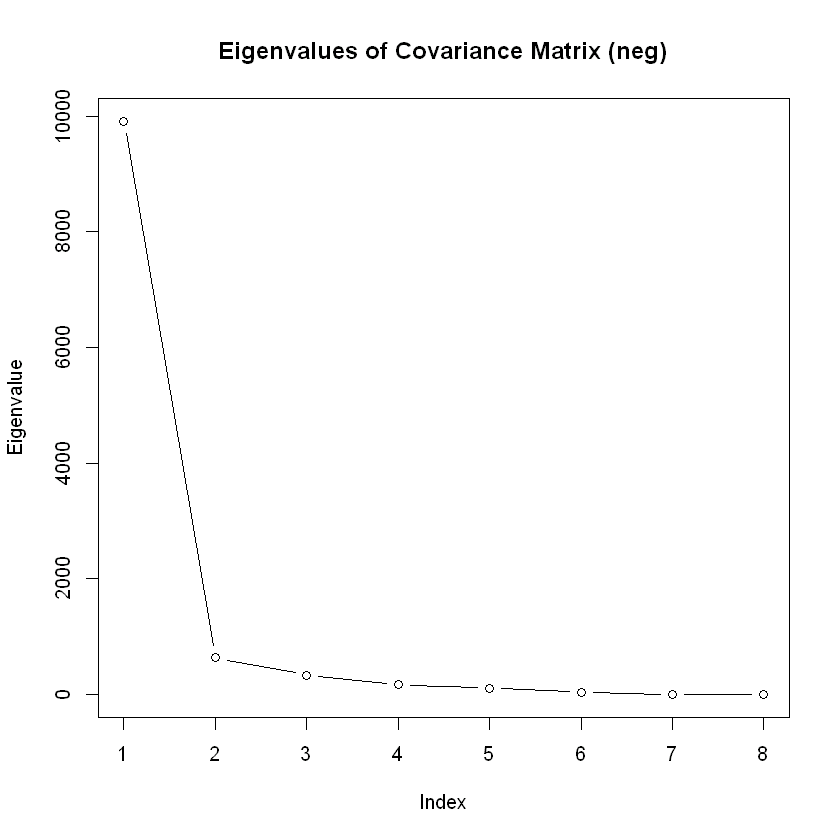

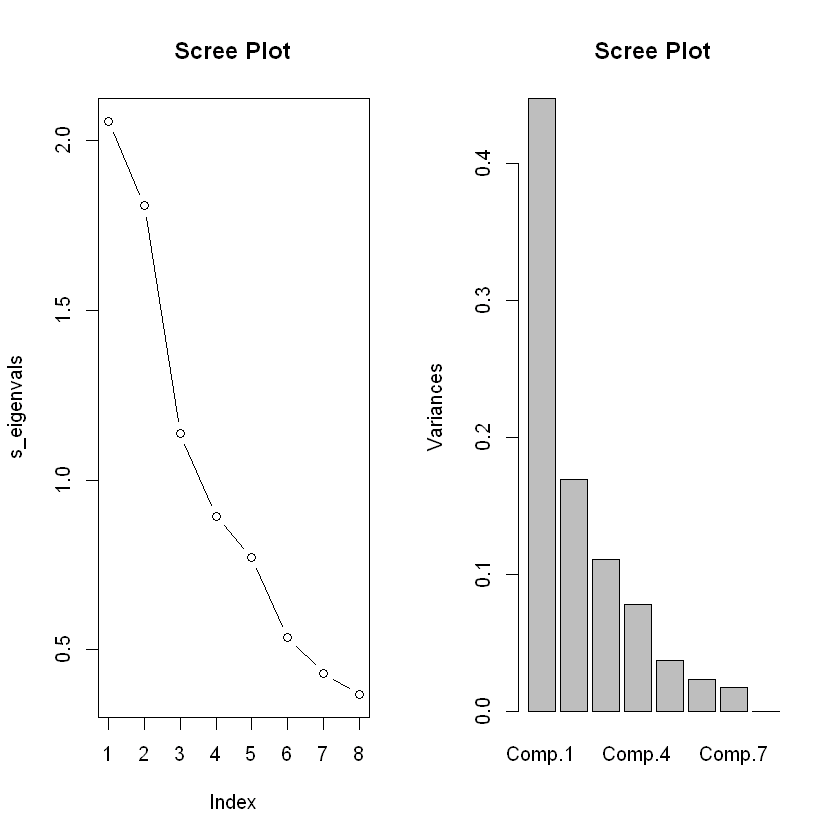

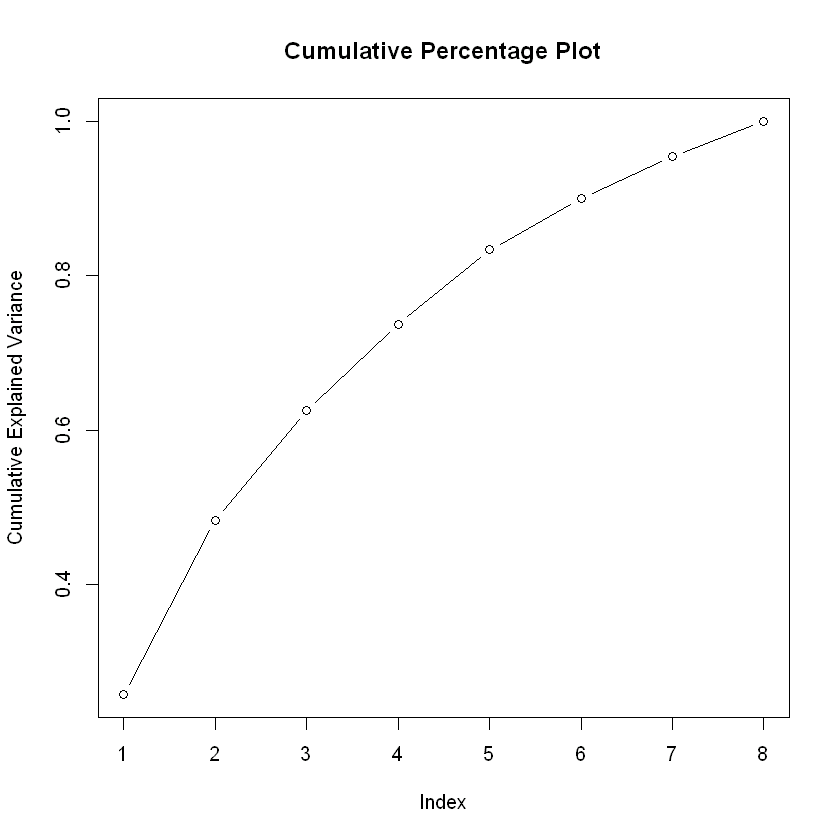

In [19]:
m_partition <- "neg"
data <- generate_factor_analysis(p_partition = m_partition, p_drop_zero = FALSE)

In [20]:
names(data)

[1] "data_partition"          "data_pca"               
[3] "covariance_matrix"       "covariance_eigenvalues" 
[5] "covariance_eigenvectors" "loadings"

In [21]:
head(data$data_partition, n = 10)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,85,66,29,0,26.6,0.351,31
4,1,89,66,23,94,28.1,0.167,21
6,5,116,74,0,0,25.6,0.201,30
8,10,115,0,0,0,35.3,0.134,29
11,4,110,92,0,0,37.6,0.191,30
13,10,139,80,0,0,27.1,1.441,57
19,1,103,30,38,83,43.3,0.183,33
21,3,126,88,41,235,39.3,0.704,27
22,8,99,84,0,0,35.4,0.388,50


In [22]:
summary(data$data_pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.4345066 1.3451406 1.0660283 0.9441938 0.87866565
Proportion of Variance 0.2572261 0.2261754 0.1420520 0.1114377 0.09650667
Cumulative Proportion  0.2572261 0.4834015 0.6254536 0.7368913 0.83339800
                           Comp.6     Comp.7     Comp.8
Standard deviation     0.73167117 0.65592520 0.60599953
Proportion of Variance 0.06691784 0.05377973 0.04590443
Cumulative Proportion  0.90031584 0.95409557 1.00000000

## Creating a Ranking via Factor Analysis

In [23]:
rank_df <- create_factor_ranking(
    data_matrix = data$data_partition,
    eigenvalues = data$covariance_eigenvalues,
    eigenvectors = data$covariance_eigenvectors,
    num_components = 3
)

rank_df <- data.frame(
    index = seq_along(rank_df),
    score = rank_df
)

rank_df <- rank_df[order(rank_df$score, decreasing = TRUE), ]
rank_df$rank <- seq_len(nrow(rank_df))
rank_df <- rank_df[, !(names(rank_df) %in% "index")]
head(rank_df)

,score,rank
,<dbl>,<int>
82,-37.79572,1
61,-39.69783,2
495,-40.15702,3
427,-43.85694,4
50,-51.40048,5
523,-54.58741,6


In [24]:
to_join <- PimaIndiansDiabetes[PimaIndiansDiabetes$diabetes == "neg", ]
joined_df <- cbind(to_join, rank_df)
head(joined_df)
tail(joined_df)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,score,rank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
2,1,85,66,29,0,26.6,0.351,31,neg,-37.79572,1
4,1,89,66,23,94,28.1,0.167,21,neg,-39.69783,2
6,5,116,74,0,0,25.6,0.201,30,neg,-40.15702,3
8,10,115,0,0,0,35.3,0.134,29,neg,-43.85694,4
11,4,110,92,0,0,37.6,0.191,30,neg,-51.40048,5
13,10,139,80,0,0,27.1,1.441,57,neg,-54.58741,6


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,score,rank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
761,2,88,58,26,16,28.4,0.766,22,neg,-306.9956,495
763,9,89,62,0,0,22.5,0.142,33,neg,-309.0608,496
764,10,101,76,48,180,32.9,0.171,63,neg,-312.9563,497
765,2,122,70,27,0,36.8,0.340,27,neg,-334.8805,498
766,5,121,72,23,112,26.2,0.245,30,neg,-346.6256,499
768,1,93,70,31,0,30.4,0.315,23,neg,-360.3883,500


In [25]:
write.csv(
    joined_df,
    file = "ranked_pima_indians_diabetes_neg.csv",
    row.names = FALSE
)